In [194]:
import numpy as np
import matplotlib.pyplot as plt


In [195]:
x_train = np.array([[4.7], [2.4], [7.5], [2.1], [4.3],
                   [7.8], [8.9], [5.2], [4.59], [2.1],
                   [8], [5], [7.5], [5], [4],
                   [8], [5.2], [4.9] ,[3] ,[4.7],
                   [4], [4.8], [3.5], [2.1], [4.1]],
                   dtype = np.float32)
y_train = np.array([[2.6], [1.6], [3.09], [2.4], [2.4],
                   [3.3], [2.6], [1.96], [3.13], [1.76],
                   [3.2], [2.1], [1.6], [2.5], [2.2],
                   [2.75], [2.4], [1.8] ,[1] ,[2],
                   [1.6], [2.4], [2.6], [1.5], [3.1]],
                   dtype = np.float32)

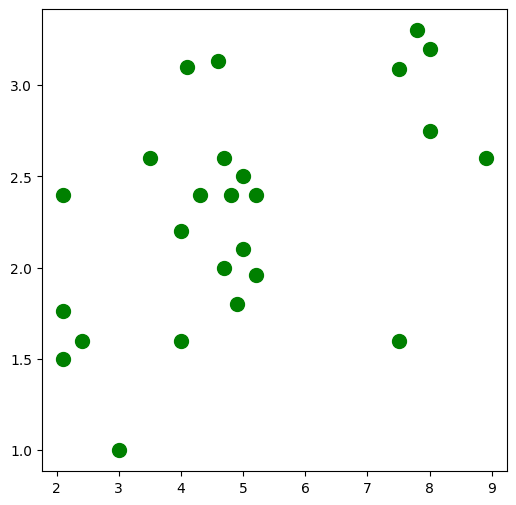

In [196]:
plt.figure(figsize=(6,6))
plt.scatter(x_train, y_train, c="green", s=100, label = "Original Data")
plt.show()

In [197]:
import torch

In [198]:
X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)
print("requires_grad for X_train : ", X_train.requires_grad)
print("requires_grad for Y_train : ", Y_train.requires_grad)

requires_grad for X_train :  False
requires_grad for Y_train :  False


In [199]:
input_size = 1
hidden_layer_size = 1
output_size = 1
learning_rate = 0.001

In [200]:
w1 = torch.rand(input_size,
                hidden_layer_size,
                requires_grad=True)
w1.shape

torch.Size([1, 1])

In [201]:
b1 = torch.rand(hidden_layer_size,
                output_size,
                requires_grad=True)
b1.shape

torch.Size([1, 1])

In [202]:
w1


tensor([[0.7273]], requires_grad=True)

In [203]:
b1

tensor([[0.1818]], requires_grad=True)

In [204]:
for iter in range(1,4001):
    y_pred = X_train.mm(w1).clamp(min=0).add(b1)
    
    loss = (y_pred - Y_train).pow(2).sum()
    
    if iter % 100 == 0 :
        print(iter, loss.item())
        
    loss.backward()
    
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        b1 -= learning_rate * b1.grad
        w1.grad.zero_()
        b1.grad.zero_()

100 8.15140438079834
200 6.872714042663574
300 6.530770778656006
400 6.4393310546875
500 6.414876937866211
600 6.4083380699157715
700 6.406589508056641
800 6.406121253967285
900 6.405996799468994
1000 6.40596342086792
1100 6.405954360961914
1200 6.405951499938965
1300 6.405952453613281
1400 6.405951023101807
1500 6.405951499938965
1600 6.405951976776123
1700 6.405951023101807
1800 6.405951499938965
1900 6.405950546264648
2000 6.405950546264648
2100 6.405950546264648
2200 6.405950546264648
2300 6.405950546264648
2400 6.405950546264648
2500 6.405950546264648
2600 6.405950546264648
2700 6.405950546264648
2800 6.405950546264648
2900 6.405950546264648
3000 6.405950546264648
3100 6.405950546264648
3200 6.405950546264648
3300 6.405950546264648
3400 6.405950546264648
3500 6.405950546264648
3600 6.405950546264648
3700 6.405950546264648
3800 6.405950546264648
3900 6.405950546264648
4000 6.405950546264648


In [205]:
print("W1 : ", w1, "\nb1 : ", b1)

W1 :  tensor([[0.1620]], requires_grad=True) 
b1 :  tensor([[1.5039]], requires_grad=True)


In [206]:
x_train_tensor = torch.from_numpy(x_train)
x_train_tensor

tensor([[4.7000],
        [2.4000],
        [7.5000],
        [2.1000],
        [4.3000],
        [7.8000],
        [8.9000],
        [5.2000],
        [4.5900],
        [2.1000],
        [8.0000],
        [5.0000],
        [7.5000],
        [5.0000],
        [4.0000],
        [8.0000],
        [5.2000],
        [4.9000],
        [3.0000],
        [4.7000],
        [4.0000],
        [4.8000],
        [3.5000],
        [2.1000],
        [4.1000]])

In [207]:
predicted_in_tensor = x_train_tensor.mm(w1).clamp(0).add(b1)
predicted_in_tensor

tensor([[2.2654],
        [1.8927],
        [2.7191],
        [1.8441],
        [2.2006],
        [2.7677],
        [2.9460],
        [2.3464],
        [2.2476],
        [1.8441],
        [2.8001],
        [2.3140],
        [2.7191],
        [2.3140],
        [2.1520],
        [2.8001],
        [2.3464],
        [2.2978],
        [1.9900],
        [2.2654],
        [2.1520],
        [2.2816],
        [2.0710],
        [1.8441],
        [2.1682]], grad_fn=<AddBackward0>)

In [208]:
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[2.2654233],
       [1.8927413],
       [2.719123 ],
       [1.8441306],
       [2.2006092],
       [2.7677338],
       [2.945973 ],
       [2.346441 ],
       [2.2475994],
       [1.8441306],
       [2.8001409],
       [2.314034 ],
       [2.719123 ],
       [2.314034 ],
       [2.1519983],
       [2.8001409],
       [2.346441 ],
       [2.2978303],
       [1.9899627],
       [2.2654233],
       [2.1519983],
       [2.281627 ],
       [2.0709805],
       [1.8441306],
       [2.168202 ]], dtype=float32)

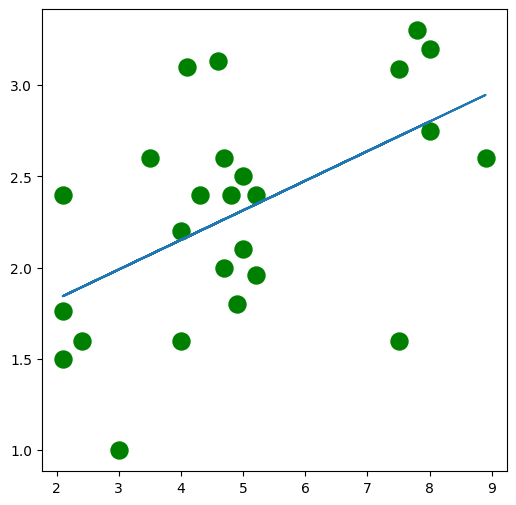

In [209]:
plt.figure(figsize=(6,6))
plt.scatter(x_train, y_train, c="green", s=150, label="Original Data")
plt.plot(x_train, predicted, label="Fitted Line") 

In [217]:
import sklearn
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)

In [218]:
print("w1 with sklearn is: ", reg.coef_)

w1 with sklearn is:  [[0.16203417]]


In [219]:
print("b1 with sklearn is: ", reg.intercept_)

b1 with sklearn is:  [1.5038643]


In [220]:
predicted = reg.predict(x_train)
predicted

array([[2.2654247],
       [1.8927463],
       [2.7191205],
       [1.844136 ],
       [2.200611 ],
       [2.7677307],
       [2.9459682],
       [2.346442 ],
       [2.247601 ],
       [1.844136 ],
       [2.8001375],
       [2.3140352],
       [2.7191205],
       [2.3140352],
       [2.152001 ],
       [2.8001375],
       [2.346442 ],
       [2.2978318],
       [1.9899669],
       [2.2654247],
       [2.152001 ],
       [2.2816284],
       [2.070984 ],
       [1.844136 ],
       [2.1682043]], dtype=float32)

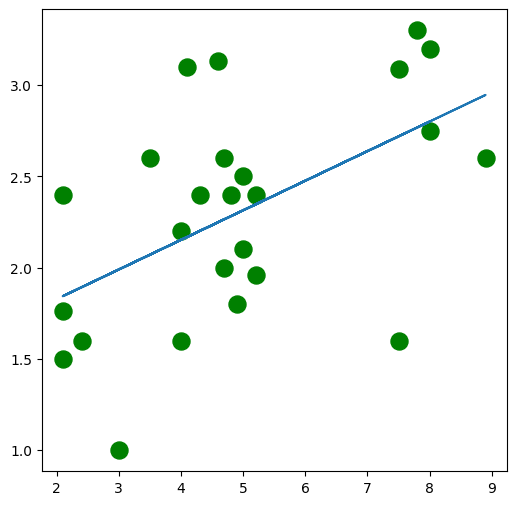

In [221]:
plt.figure(figsize=(6,6))
plt.scatter(x_train, y_train, c="green", s=150, label="Original Data")
plt.plot(x_train, predicted, label="Fitted Line") 